STEP 1: Importing libraries...
✅ Libraries imported successfully.
💡 Make sure you have scikit-learn installed (`pip install scikit-learn`)

STEP 2: Loading and cleaning data...
✅ Data loaded and cleaned. Working with 59615 records.

STEP 3: Preparing data for K-Means...
✅ Categorical data has been encoded.
Sample of data ready for clustering:
   date of birth  Year of registration  High school success rate  city  \
0           1993                  2012                        88    21   
1           1995                  2013                        84    18   
2           1994                  2013                        85    21   
3           1994                  2013                        85    21   
4           1996                  2015                        86    21   

   Specialization ID  Gender  School system  
0                  0       0              1  
1                  0       0              1  
2                  0       0              1  
3                  0      

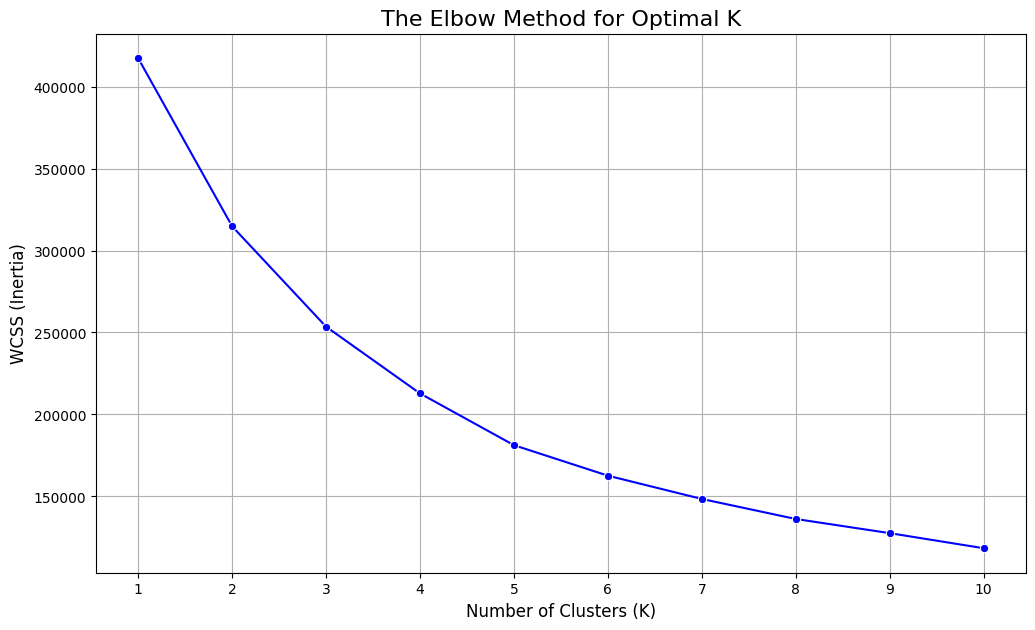

📈 **الرجاء فحص الرسم البياني 'للكوع' (Elbow).**
اختر الرقم K حيث يبدأ الخط في الاستواء (مثل 'كوع' الذراع).
كمثال، سنختار K=4. *يجب تعديل هذا الرقم بناءً على الرسم البياني!*

STEP 5: Applying K-Means algorithm with K=4...
✅ K-Means applied. Students have been assigned to clusters.

STEP 6: Analyzing and saving results...

--- Cluster Analysis (Averages per Cluster) ---
         date of birth  Year of registration  High school success rate
Cluster                                                               
0          2001.890067           2020.490442                 70.175100
1          1997.109746           2015.551330                 81.123399
2          1996.465864           2015.078193                 78.721972
3          1993.232727           2012.598384                 76.520000

--- Cluster Analysis (Most Common per Cluster) ---

Most common in 'city':
Cluster
0    الأصابعة
1       غريان
2       غريان
3       غريان
Name: city, dtype: object

Most common in 'Specialization ID':


In [1]:
# ==============================================================================
#                 Phase 2.2: K-Means Clustering
# ==============================================================================
# الهدف: تجميع الطلاب في مجموعات متجانسة بناءً على خصائصهم

# -----------------------------------------------------
# STEP 1: Import Libraries
# -----------------------------------------------------
print("STEP 1: Importing libraries...")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')
print("✅ Libraries imported successfully.")
print("💡 Make sure you have scikit-learn installed (`pip install scikit-learn`)")


# -----------------------------------------------------
# STEP 2: Load and Clean Data
# -----------------------------------------------------
print("\nSTEP 2: Loading and cleaning data...")
file_name = "high_school.csv"
try:
    df = pd.read_csv(file_name)
    df_cleaned = df.dropna()
    print(f"✅ Data loaded and cleaned. Working with {len(df_cleaned)} records.")
except FileNotFoundError:
    print(f"❌ ERROR: The file '{file_name}' was not found.")
    exit()

# -----------------------------------------------------
# STEP 3: Feature Selection and Pre-processing for K-Means
# -----------------------------------------------------
print("\nSTEP 3: Preparing data for K-Means...")

# اختيار الخصائص التي نريد التجميع بناءً عليها
# سنستخدم مزيجاً من الخصائص الرقمية والفئوية كما اقترح الزبون
features = [
    'date of birth', 
    'Year of registration', 
    'High school success rate', 
    'city', 
    'Specialization ID',
    'Gender',
    'School system'
]
df_cluster = df_cleaned[features].copy()

# --- تحويل البيانات الفئوية (Categorical) إلى رقمية ---
# K-Means لا يفهم النصوص، لذا نستخدم LabelEncoder
encoders = {}
for col in ['city', 'Specialization ID', 'Gender', 'School system']:
    le = LabelEncoder()
    df_cluster[col] = le.fit_transform(df_cluster[col])
    encoders[col] = le # نحتفظ بالـ encoder لربما نحتاجه لاحقاً

print("✅ Categorical data has been encoded.")
print("Sample of data ready for clustering:")
print(df_cluster.head())

# --- توحيد المقاييس (Feature Scaling) ---
# هذه خطوة ضرورية لأن K-Means حساسة لاختلاف مقاييس البيانات
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

print("✅ Data has been scaled (Standardized).")


# -----------------------------------------------------
# STEP 4: Find Optimal K using the Elbow Method
# -----------------------------------------------------
print("\nSTEP 4: Finding optimal K using the Elbow Method...")

# سنقوم بحساب مجموع مربعات المسافات داخل المجموعات (WCSS)
# لعدد مجموعات من 1 إلى 10
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_) # inertia_ هو قيمة الـ WCSS

# رسم بياني لطريقة الكوع
plt.figure(figsize=(12, 7))
sns.lineplot(x=list(k_range), y=wcss, marker='o', color='blue')
plt.title('The Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Inertia)', fontsize=12)
plt.xticks(list(k_range))
plt.grid(True)
plt.show()

print("📈 **الرجاء فحص الرسم البياني 'للكوع' (Elbow).**")
print("اختر الرقم K حيث يبدأ الخط في الاستواء (مثل 'كوع' الذراع).")
print("كمثال، سنختار K=4. *يجب تعديل هذا الرقم بناءً على الرسم البياني!*")


# -----------------------------------------------------
# STEP 5: Apply K-Means with the Chosen K
# -----------------------------------------------------
# !!! تحديث هذا الرقم بناءً على الرسم البياني !!!
OPTIMAL_K = 4 
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

print(f"\nSTEP 5: Applying K-Means algorithm with K={OPTIMAL_K}...")

kmeans = KMeans(n_clusters=OPTIMAL_K, init='k-means++', n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

print("✅ K-Means applied. Students have been assigned to clusters.")


# -----------------------------------------------------
# STEP 6: Analyze and Save Clustered Data
# -----------------------------------------------------
print("\nSTEP 6: Analyzing and saving results...")

# إضافة عمود "Cluster" الجديد إلى الداتا فريم الأصلية
df_cleaned['Cluster'] = cluster_labels

# عرض ملخص بسيط لكل مجموعة
print("\n--- Cluster Analysis (Averages per Cluster) ---")
# إضافة الخصائص الرقمية الأصلية إلى الداتا فريم لتحليلها
df_cleaned_analysis = df_cleaned.copy()
# إضافة الخصائص التي تم تحويلها رقمياً لتحليلها
for col in ['city', 'Specialization ID', 'Gender', 'School system']:
    df_cleaned_analysis[col] = df_cluster[col]

# عرض المتوسطات لكل مجموعة
cluster_summary = df_cleaned_analysis.groupby('Cluster')[
    ['date of birth', 'Year of registration', 'High school success rate']
].mean()
print(cluster_summary)

print("\n--- Cluster Analysis (Most Common per Cluster) ---")
# عرض القيم الأكثر شيوعاً (Mode) للخصائص الفئوية
for col in ['city', 'Specialization ID', 'Gender', 'School system']:
    # استخدام الداتا فريم الأصلية (df_cleaned) لعرض الأسماء الحقيقية
    print(f"\nMost common in '{col}':")
    print(df_cleaned.groupby('Cluster')[col].agg(pd.Series.mode))


# حفظ الداتا فريم الجديدة التي تحتوي على عمود "Cluster"
output_file = "clustered_students.csv"
df_cleaned.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"\n\n✅ Analysis complete. The new dataset with cluster assignments")
print(f"has been saved as '{output_file}'.")